<a href="https://colab.research.google.com/github/bin010203/Machine-Learning/blob/main/A1_09_2%E4%BF%AE%E6%AD%A3%E9%81%8E%E5%BA%A6%E6%93%AC%E5%90%88_%E9%9D%9E%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8_%E7%9F%A9%E9%99%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 實作09：修正過度擬合_非線性回歸-利用矩陣運算
##自變數x的4次方的非線性迴歸

### (0)掛載雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (1)import必要的套件

In [ ]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
#要記得改為自己的字形檔案路徑
twfont1 = plt_font.FontProperties(
    fname="/content/drive/MyDrive/Colab Notebooks/kaiu.ttf")
#若 fname 沒有設定路徑檔案,此格不會出錯,但是後面繪圖用中文字形會出錯

### (2)定義特徵縮放的函數

In [ ]:
#參數kind預設為0，做標準化；kind設為1，做歸一化
def FeatureScaling(data,kind=0):
  if kind==1:
    return (data-data.min())/(data.max()-data.min())
  else:
    return (data-data.mean())/data.std()
#若 return 沒有設定數學公式,此格不會出錯,但是後面訓練時會出錯

### (3)將原始資料分為訓練資料集和驗證資料集

In [ ]:
#由自己的雲端SalesVolume.csv檔案載入資料集
data= np.loadtxt(
    "/content/drive/MyDrive/Colab Notebooks/SalesVolume.csv",
    delimiter=",")
#第0列為廣告推播次數，並做特徵縮放，
#第2參數設為0是標準化，設為1是歸一化
data_x=FeatureScaling(data[0],0)
data_y=data[1] #第1列為商品銷售數量
#訓練資料集12筆
train_x=data_x[:12]
train_y=data_y[:12]
#驗證資料集8筆
valid_x=data_x[12:]
valid_y=data_y[12:]

### (4)產生自變數資料和依變數資料的矩陣

In [ ]:
#自變數x的3次方的非線性迴歸
#垂直堆疊x,x**2,x**3,x**4，再轉置組成X矩陣
def Xmatrix(x):
  return np.vstack([x,x**2,x**3,x**4]).T
#若 return 沒有設定數學公式,此格不會出錯,但是後面訓練時會出錯
#將訓練集資料和驗證集資料的自變數x轉成[K列m+1行]矩陣
mtx_train_x=Xmatrix(train_x)
mtx_valid_x=Xmatrix(valid_x)
#將訓練集資料和驗證集資料的依變數y轉成[K列1行]矩陣
mtx_train_y=train_y.reshape((-1,1))
mtx_valid_y=valid_y.reshape((-1,1))

In [ ]:
mtx_train_x.shape

(12, 4)

In [ ]:
mtx_train_x

array([[ 1.47680664e+00,  2.18095784e+00,  3.22085302e+00,
         4.75657711e+00],
       [ 1.17387194e+00,  1.37797534e+00,  1.61756659e+00,
         1.89881603e+00],
       [ 1.13600511e-01,  1.29050760e-02,  1.46602322e-03,
         1.66540986e-04],
       [-1.55254031e+00,  2.41038142e+00, -3.74221431e+00,
         5.80993857e+00],
       [-7.95203574e-01,  6.32348724e-01, -5.02845965e-01,
         3.99864909e-01],
       [ 8.70937248e-01,  7.58531689e-01,  6.60633501e-01,
         5.75370323e-01],
       [-1.40107296e+00,  1.96300545e+00, -2.75031386e+00,
         3.85339039e+00],
       [-1.70400766e+00,  2.90364210e+00, -4.94782837e+00,
         8.43113744e+00],
       [ 4.16535205e-01,  1.73501577e-01,  7.22695151e-02,
         3.01027973e-02],
       [ 7.19469900e-01,  5.17636937e-01,  3.72424196e-01,
         2.67947999e-01],
       [-1.89334184e-01,  3.58474333e-02, -6.78714455e-03,
         1.28503848e-03],
       [-6.43736226e-01,  4.14396329e-01, -2.66761929e-01,
      

In [ ]:
mtx_train_y.shape

(12, 1)

In [ ]:
mtx_train_y

array([[591.],
       [543.],
       [410.],
       [310.],
       [319.],
       [520.],
       [338.],
       [330.],
       [501.],
       [508.],
       [399.],
       [331.]])

### (5)隨機初始化迴歸係數矩陣

In [ ]:
#亂數初始化迴歸係數為[m列1行]矩陣
b=np.random.rand(1)
W=np.random.rand(4).reshape((4,1))
b

array([0.8936886])

In [ ]:
W

array([[0.11893566],
       [0.98189492],
       [0.67193141],
       [0.05469528]])

In [ ]:
W.shape

(4, 1)

### (6)計算迴歸模型函數的預測結果矩陣

In [ ]:
def F(x):
  return np.dot(x,W)+b
#若 return 沒有設定數學公式,此格不會出錯,但是後面訓練時會出錯

### (7)定義損失函數LOSS Funcation

In [ ]:
def Loss(x, y):
    return 0.5*np.sum((y-F(x))**2)
#若 return 沒有設定數學公式,此格不會出錯,但是後面訓練時會出錯

### (8)設定學習率和權重更新次數

In [ ]:
# Step_Loss_valid

In [ ]:
ETA = 0.0001
Step_Loss=[]
=[]

### (9)開始訓練模型

In [ ]:
#  Loss(mtx_valid_x, mtx_valid_y)
# current_loss_valid

In [ ]:
for epoch in range(10000):
    #利用梯度下降更新迴歸係數
    b=b-ETA*np.sum(F(mtx_train_x)-mtx_train_y)
    W=W-ETA*np.dot(mtx_train_x.T,
                   (F(mtx_train_x)-mtx_train_y))
    if epoch%100==99:
        current_loss = Loss(mtx_train_x, mtx_train_y) #訓練集的損失函數
        current_loss_valid =      #驗證集的損失
        Step_Loss.append(current_loss)  #訓練集的損失函數列表
        Step_Loss_valid.append()  #驗證集的損失函數列表
        print("訓練次數:",epoch+1,"\n偏值:",b,
              "\n權重:",W,"\n損失函數:",current_loss,
              "\n驗證資料損失函數:",current_loss_valid)
        #display.clear_output(wait=True)

訓練次數: 100 
偏值: [39.30262445] 
權重: [[10.80775637]
 [31.43375242]
 [12.0637128 ]
 [46.24063226]] 
損失函數: 574838.5768999842 
驗證資料損失函數: 466894.99048997357
訓練次數: 200 
偏值: [67.01822062] 
權重: [[21.486356  ]
 [43.88324526]
 [28.14555186]
 [53.06717493]] 
損失函數: 438298.7953473322 
驗證資料損失函數: 511758.04803703446
訓練次數: 300 
偏值: [90.67096885] 
權重: [[28.92979719]
 [51.98157211]
 [38.70915275]
 [52.79840106]] 
損失函數: 358625.6199109035 
驗證資料損失函數: 544504.8812553128
訓練次數: 400 
偏值: [111.70444106] 
權重: [[33.90473982]
 [58.11106765]
 [44.69520573]
 [50.37753091]] 
損失函數: 303805.97406601487 
驗證資料損失函數: 546946.3255099135
訓練次數: 500 
偏值: [130.7166762] 
權重: [[37.26020257]
 [63.0053509 ]
 [47.65024504]
 [46.98901513]] 
損失函數: 262048.93905551353 
驗證資料損失函數: 525304.1098392719
訓練次數: 600 
偏值: [148.07327796] 
權重: [[39.58576153]
 [67.04099433]
 [48.68512714]
 [43.13651384]] 
損失函數: 228140.30288264455 
驗證資料損失函數: 488656.3345169198
訓練次數: 700 
偏值: [164.02795427] 
權重: [[41.26485271]
 [70.45294889]
 [48.5267192 ]
 [39.10455473]] 
損失

### (10)畫圖檢查模型訓練結果

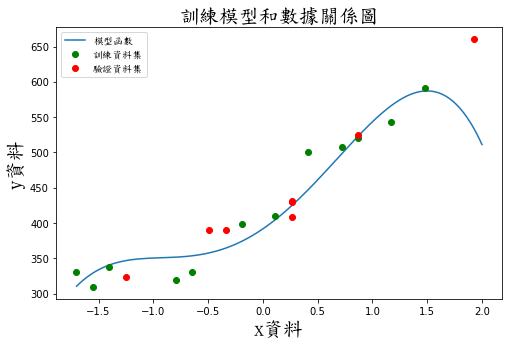

In [ ]:
plt.figure(figsize=(8,5))
plt.title("訓練模型和數據關係圖",
          fontproperties=twfont1,fontsize=20) 
plt.xlabel("x資料",fontproperties=twfont1,fontsize=20) 
plt.ylabel("y資料",fontproperties=twfont1,fontsize=20)
x = np.linspace(-1.7,2, 2000)
plt.plot(x, F(Xmatrix(x)),label="模型函數")
plt.plot(train_x, train_y, 'go',label="訓練資料集")
plt.plot(valid_x, valid_y, 'ro',label="驗證資料集")
plt.legend(prop=twfont1)
plt.show()

### (11)觀察Loss值隨訓練次數的變化

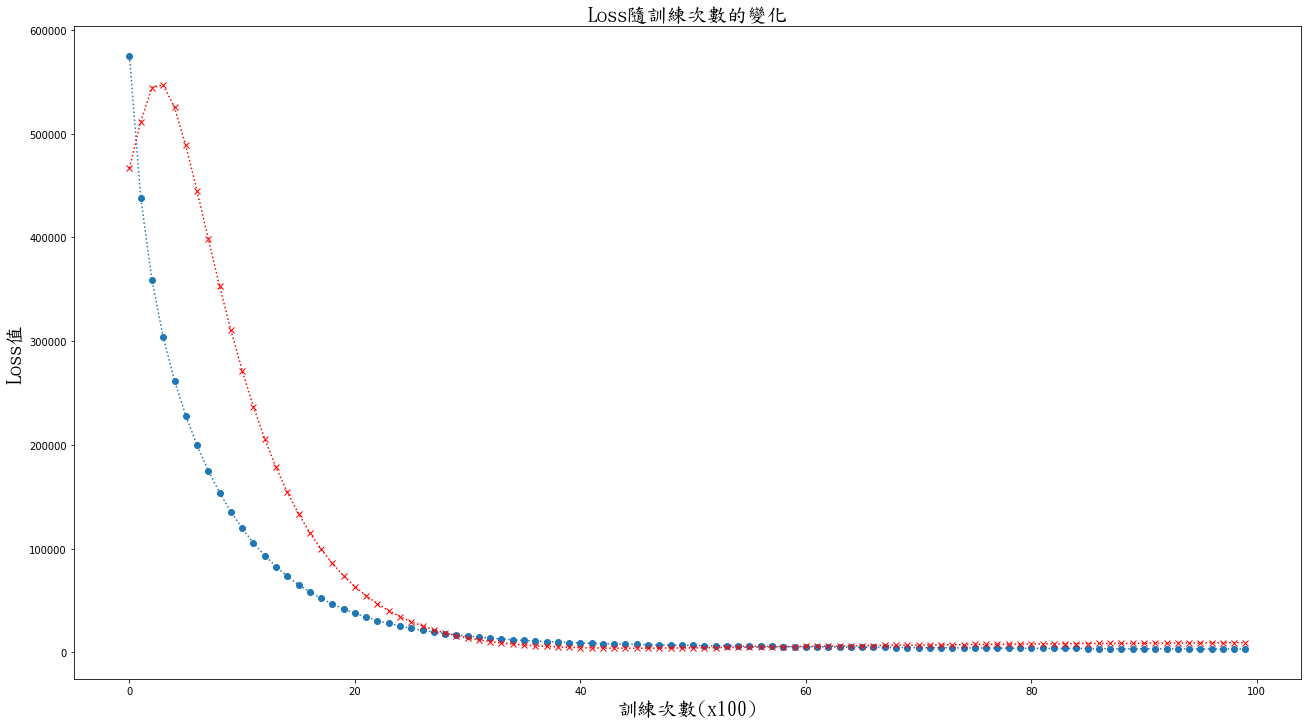

In [ ]:
plt.figure(figsize=(22,12))
#plt.ylim =2400000
plt.title("Loss隨訓練次數的變化",
          fontproperties=twfont1,fontsize=20) 
plt.xlabel("訓練次數(x100)",
           fontproperties=twfont1,fontsize=20) 
plt.ylabel("Loss值",
           fontproperties=twfont1,fontsize=20)
plt.plot(Step_Loss,":o")
plt.plot(Step_Loss_valid,"r:x")
plt.show()

### (12)比較訓練好的迴歸模型函數在訓練資料集和驗證資料集的每筆平均Loss值

In [ ]:
print("訓練資料集對回歸模型的每筆平均Loss值",
      Loss(mtx_train_x, mtx_train_y)/np.size(train_x))
print("驗證資料集對回歸模型的每筆平均Loss值",
      Loss(mtx_valid_x, mtx_valid_y)/np.size(valid_x))

訓練資料集對回歸模型的每筆平均Loss值 271.3280554006936
驗證資料集對回歸模型的每筆平均Loss值 1177.975060848738
